# 第 14 章 数据可视化进阶

**本章内容提要**:

- Seaborn <https://mp.weixin.qq.com/s/AU-IEEQvmBxBZ7GBZIZwBA>
- Bokeh
- plotnine <https://zhuanlan.zhihu.com/p/47814353> <https://plotnine.readthedocs.io/en/stable/about-plotnine.html>



前面章节中我们使用的绘图方法都来自于 Matplotlib 库，它是 Python 可视化的基础。随着近年来数据分析的流行，Python 社区出现了越来越多的可视化库，包括基于 Matplotlib 库的 Seaborn 和支持交互式展示的 Bokeh。它们提供了更易用、更美观、交互性更强的可视化方式。本章将对目前流行的 Python 高级可视化库进行介绍，并通过一些例子展示它们的使用方法和可视化效果。

## 14.1 Seaborn

Seaborn 在 Matplotlib 库的基础上进行了更高级的封装，提供了更高级别的接口用于绘制优雅美观、具有吸引力的统计图形。

Seaborn 的默认别名是 sns，所以导入时一般采用以下的约定：

In [2]:
import seaborn as sns

我们接下来依旧使用之前提及的汽车统计数据用于可视化。

In [3]:
import pandas as pd
import numpy as np

mtcars = pd.read_csv('files/chapter11/mtcars.csv')

我们先查看整个数据集的信息，结果显示一共有 11 个变量（列），32 辆车的记录。

In [10]:
mtcars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 11 columns):
mpg     32 non-null float64
cyl     32 non-null int64
disp    32 non-null float64
hp      32 non-null int64
drat    32 non-null float64
wt      32 non-null float64
qsec    32 non-null float64
vs      32 non-null int64
am      32 non-null int64
gear    32 non-null int64
carb    32 non-null int64
dtypes: float64(5), int64(6)
memory usage: 2.9 KB


为了观察变量的数值分布，我们一般使用 describe() 方法进行数据汇总。

In [4]:
mtcars.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


相比于汇总表格，图形更加直观，特别是在观察数据的变化趋势方面。这时候，Seaborn 库就排上用场了。

### 14.1.1 成对图

我们接下来使用成对的图形来展示两两变量之间的变化趋势。

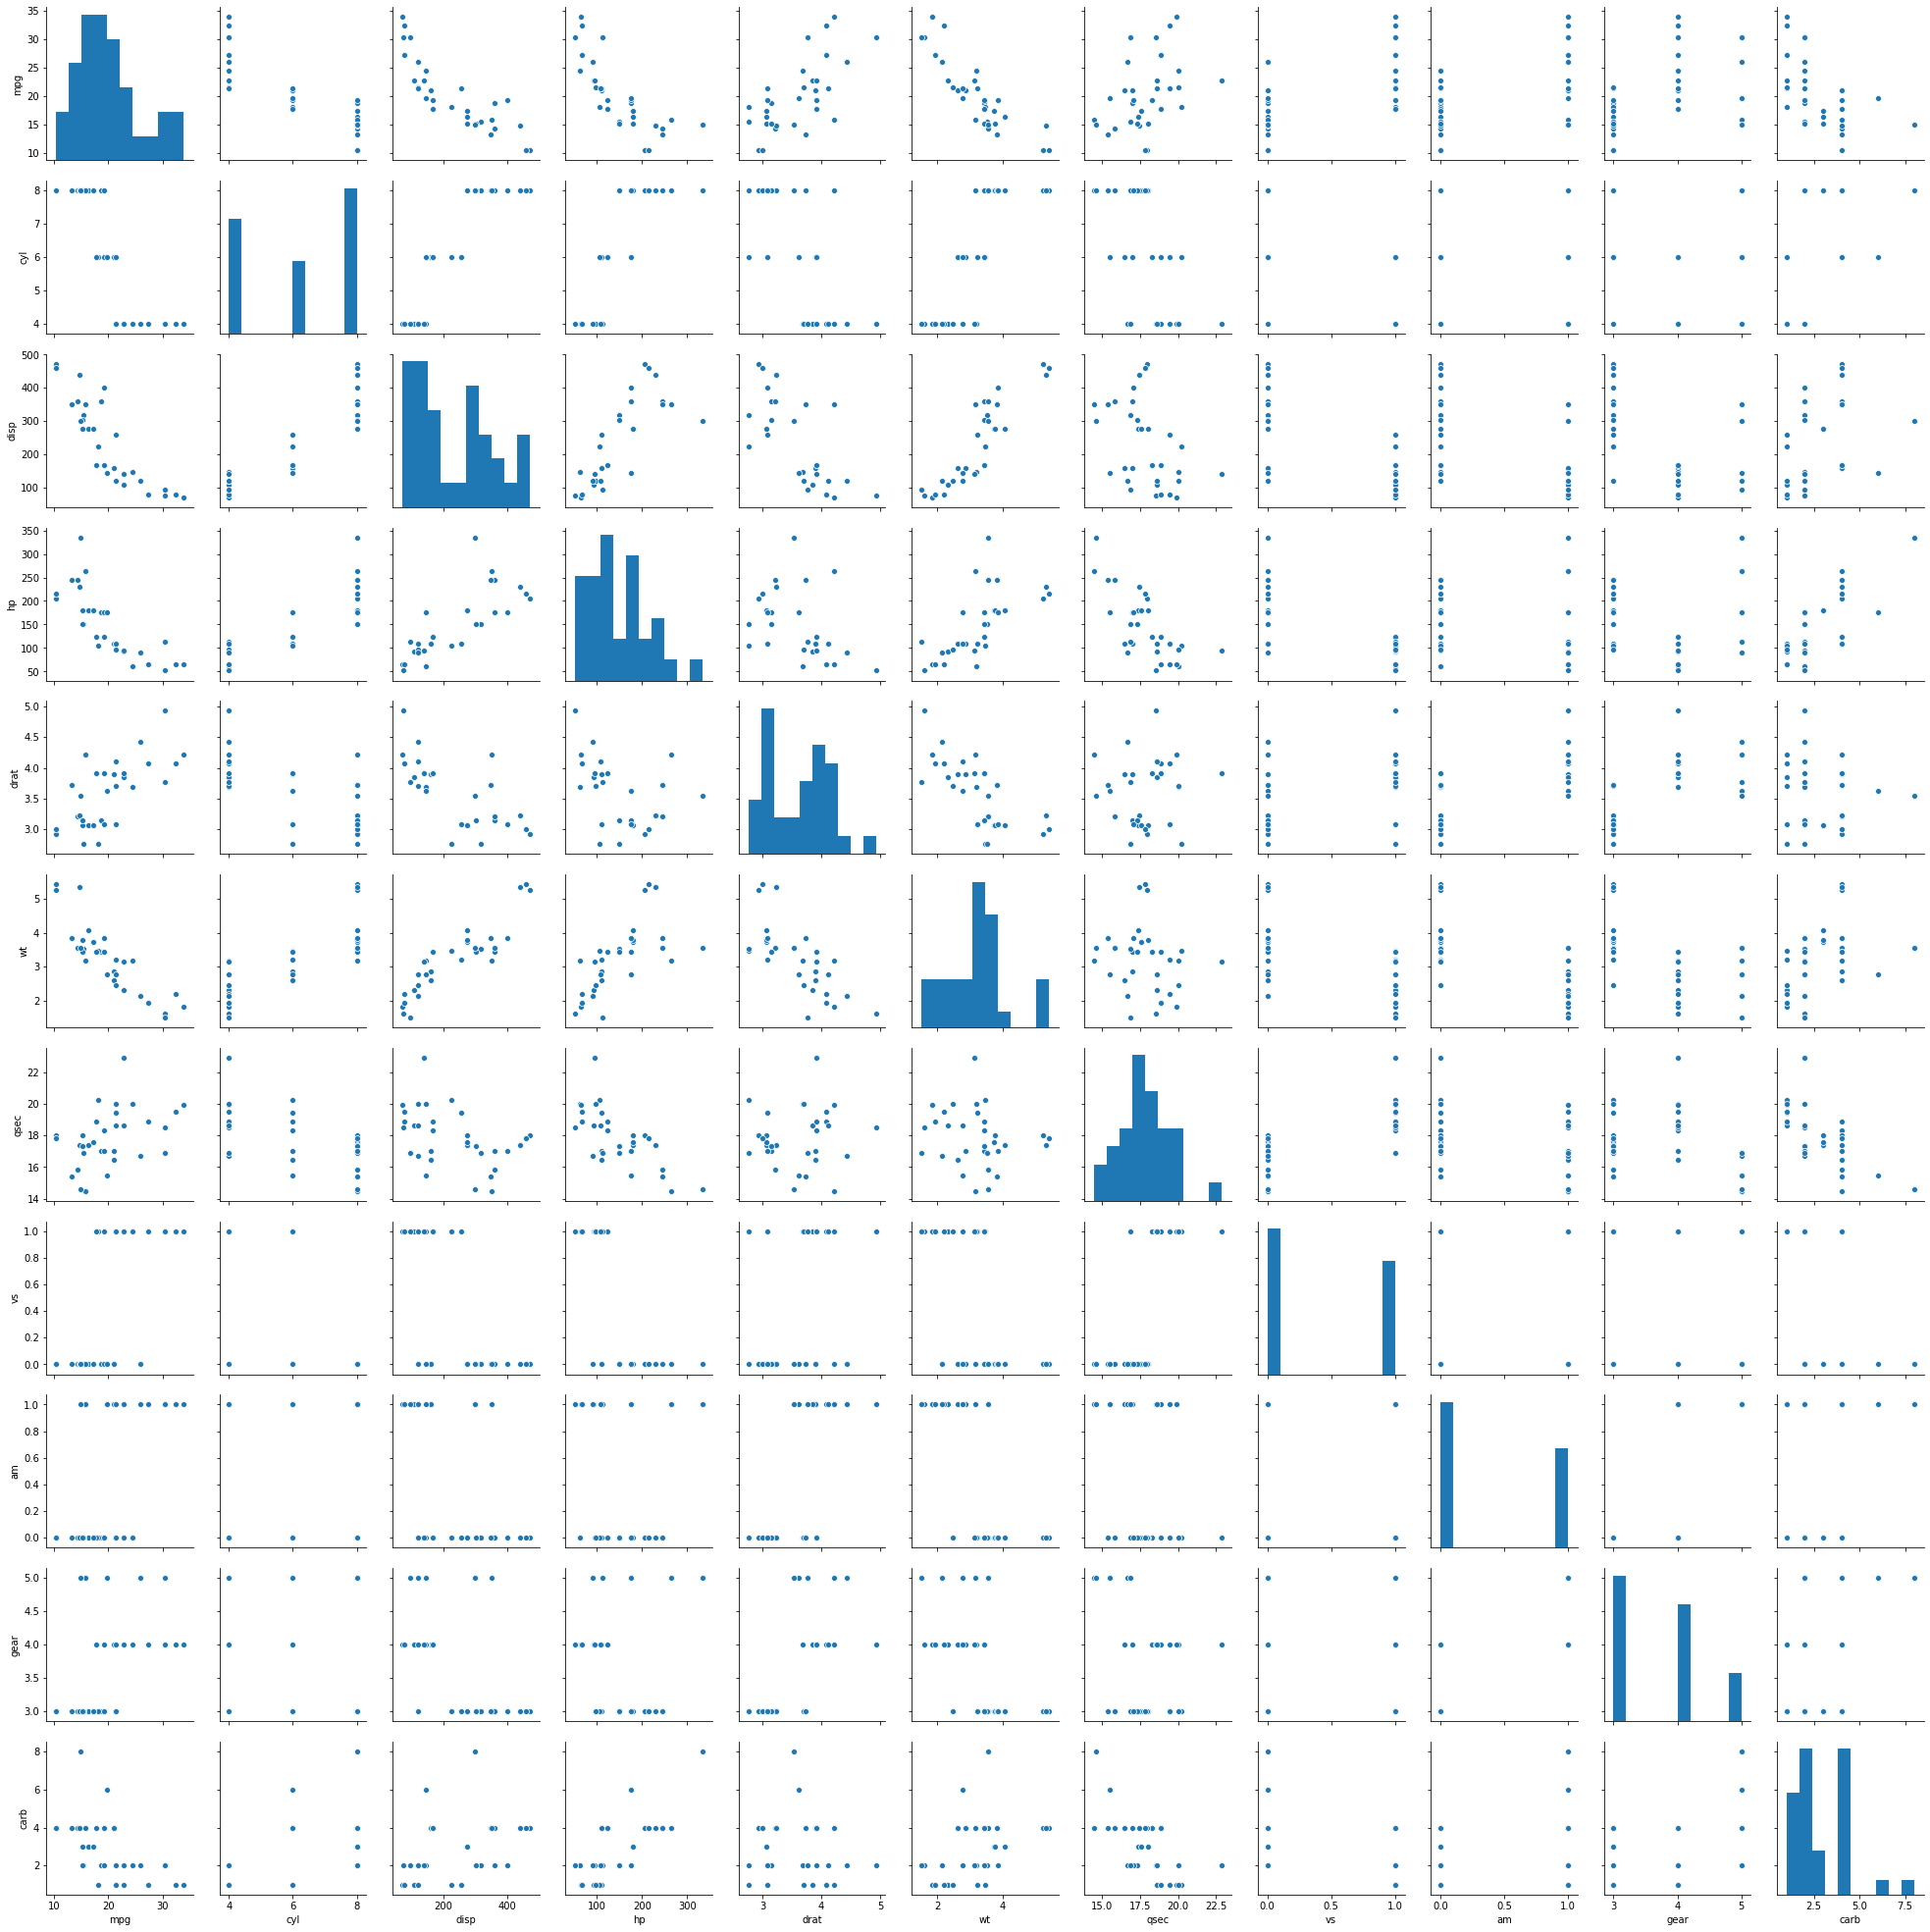

In [7]:
%matplotlib inline
sns.pairplot(mtcars)

上图对角线展示的是单个变量的数据分布，我们可以非常直观地观测到哪些变量是离散的，哪些是连续的，连续变量的分布趋势是怎样的。非对角线展示的是两个变量之间的变化趋势。

第 3 到 第 7 个变量看起来存在着比较明显的线性关系，我们单独展示它们看看。

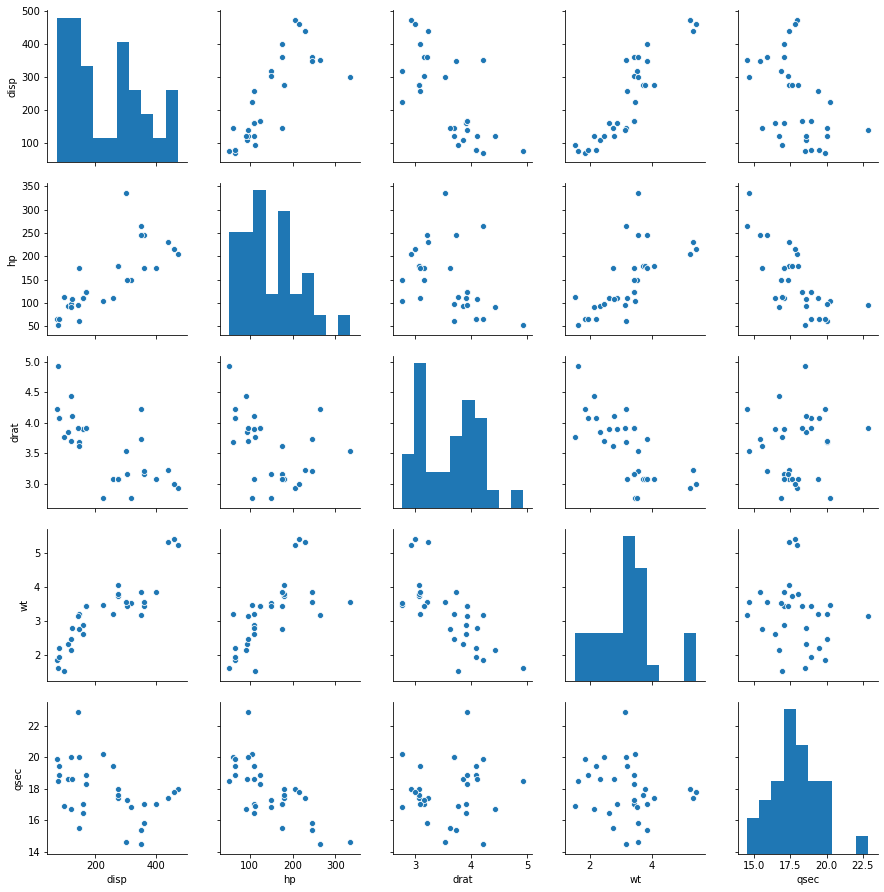

In [12]:
sns.pairplot(mtcars.iloc[:, 2:7])

特别地，我们查看下汽车重量和每加仑油耗行驶的英里数之间的关系。

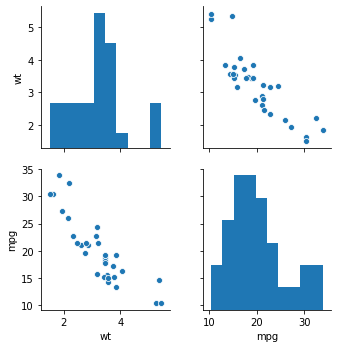

In [13]:
sns.pairplot(mtcars.loc[:, ['wt', 'mpg']])

不难发现汽车越重，车程越短。这种关系是否会受到其他因素的影响呢？例如，汽车的气缸数。我们将 cyl 加入绘图并根据它的值赋予颜色，生成带分类标签的图。

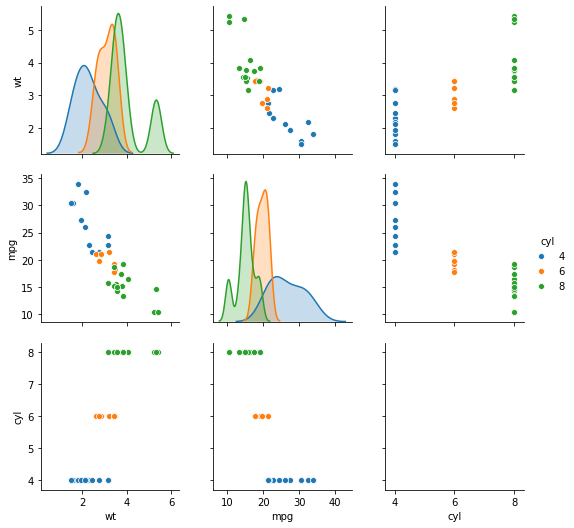

In [17]:
sns.pairplot(mtcars.loc[:, ['wt', 'mpg', 'cyl']], hue='cyl')

第 2 个子图的结果告诉我们上述的关系不受气缸数的影响，另外我们可以看到气缸数越多的车辆重量也越大。这些结果与我们的常识一致。

默认 Seaborn 使用的是白色的（背景）风格，我们可以通过 set_style() 函数进行修改。

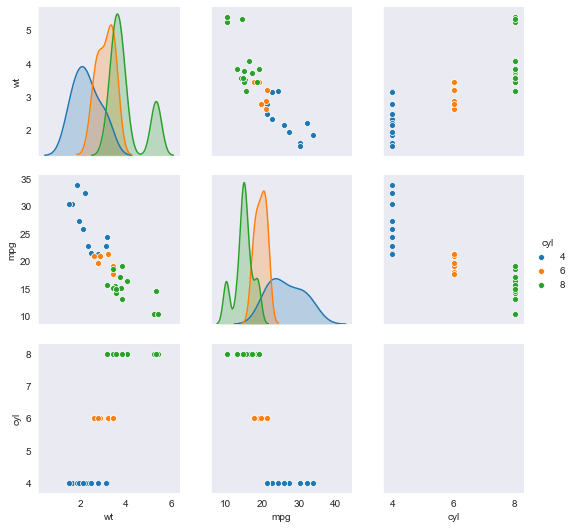

In [21]:
sns.set_style('dark')
sns.pairplot(mtcars.loc[:, ['wt', 'mpg', 'cyl']], 
             hue='cyl')

可以设置的选项一共有 5 种：darkgrid、whitegrid、dark、white 和 ticks。

我们还可以使用 set_palette() 修改调色板，例如，让上面图形的配色更适合色盲人观看。

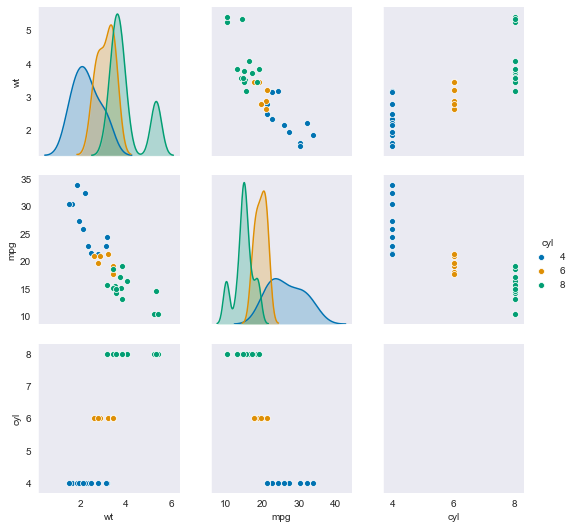

In [23]:
sns.set_style('dark')
sns.set_palette('colorblind')
sns.pairplot(mtcars.loc[:, ['wt', 'mpg', 'cyl']], 
             hue='cyl')

Seaborn 支持六种调色盘：deep、muted、pastel、bright、dark 和 colorblind。

### 14.1.2 子集图

上面我们是通过 Pandas 的数据筛选操作仅展示我们想要观察的变量，实际上 Seaborn 本身就支持子集图的展示，只需要将展示的变量传入 vars 参数。

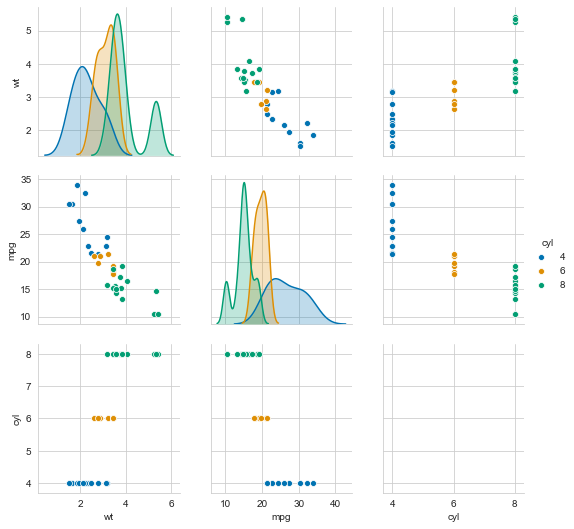

In [24]:
sns.set_style('whitegrid')
sns.pairplot(mtcars, 
             hue='cyl',
             vars=['wt', 'mpg', 'cyl'])

下面代码将风格设为白色，并用横轴和纵轴展示不同的变量，也就是说可以用 4 个子图展示 4 个变量之间的数据分布趋势。然后加上颜色信息，一共可以展示 5 个变量。

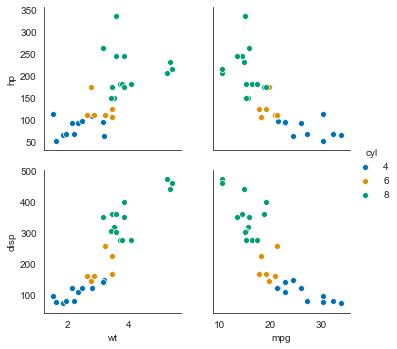

In [25]:
sns.set_style('white')
sns.pairplot(mtcars,
            hue='cyl',
            x_vars=['wt', 'mpg'],
            y_vars=['hp', 'disp'])

### 14.1.3 回归图

上一个图我们看到 4 个变量之间存在明显的线性关系，当我们添加选项 kind='reg' 后，Seaborn 会自动为图形添加上回归线。

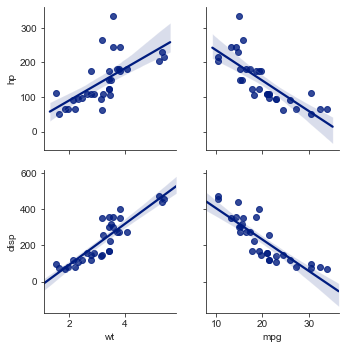

In [27]:
sns.set_style('ticks')
sns.set_palette('dark')
sns.pairplot(mtcars,
            x_vars=['wt', 'mpg'],
            y_vars=['hp', 'disp'],
            kind='reg')

### 14.1.4 核密度图

核密度图在展示数据的平滑分布时更为有效，这可以通过 diag_kind='kde' 让对角线展示每个变量分布的核密度估计。

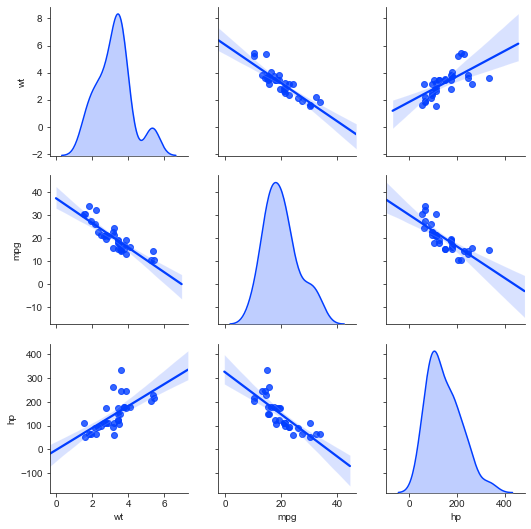

In [29]:
sns.set_palette('bright')
sns.pairplot(mtcars.loc[:, ['wt', 'mpg', 'hp']],
            kind='reg', diag_kind='kde')

前面 pairplot() 提供的丰富特性已经足以满足很多的数据探索性分析需求。接下来本书会介绍一些统计分析常见图形的 Seaborn 实现，它们的使用非常简单，一般通过指定绘图使用的 DataFrame 和坐标轴需要展示的变量名称就可以完成绘图。

### 14.1.5 条形图

barplot() 函数用于绘制条形图，下面结果展示了汽车不同气缸数行程的差别。注意，竖线表示置信区间。

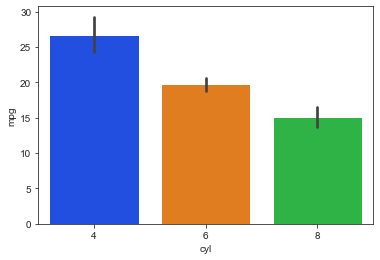

In [30]:
sns.barplot(x='cyl', y='mpg', data=mtcars)

我们看看引擎类型变量 vs 的不同是否会影响上述的差异。

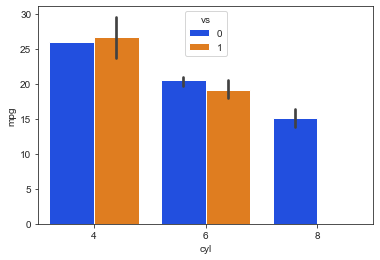

In [31]:
sns.barplot(x='cyl', y='mpg', hue='vs',
            data=mtcars)

结果表明汽车行程不怎么受引擎类型的影响。

### 14.1.6 计数图

countplot() 函数用于绘制计数图，该种图形类型适合分类数据，如气缸数。

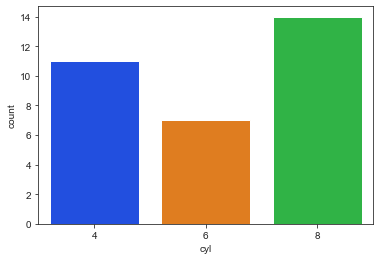

In [32]:
sns.countplot(x='cyl', data=mtcars)

不难发现 32 种汽车气缸数为 8 的最多，为 6 的最少。

### 14.1.7 点图

pointplot() 函数用于绘制点图。点图的使用率很高，适用范围也很广泛。

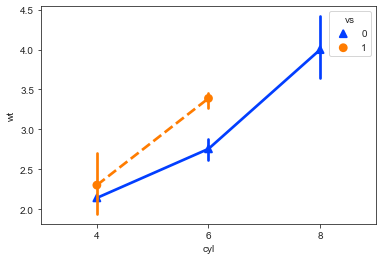

In [37]:
sns.pointplot(x='cyl', 
              y='wt',
              hue='vs',
              markers=['^', 'o'],
              linestyles=['-', '--'],
              data=mtcars)

相比于条形图，线图更适用于展示不同引擎类型下汽车重量随气缸数的变化。

### 14.1.8 箱线图

boxplot() 函数用于绘制箱线图。箱线图在统计分析中非常常用，相比于线图和条形图，它可以简单直观的观察数据的样本量、分布以及差异。

使用和上一个图一样的数据和变量，下面的箱线图显示效果完全不同于线图。

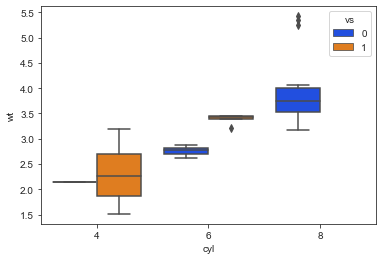

In [39]:
sns.boxplot(x='cyl', 
              y='wt',
              hue='vs',
              data=mtcars)

### 14.1.9 小提琴图

violinplot() 函数用于绘制小提琴图。小提琴图是箱线图的拓展，它增加了对数据分布更为直观的视觉感受。

使用与箱线图完全一致的数据，我们再看看小提琴图是如何的。

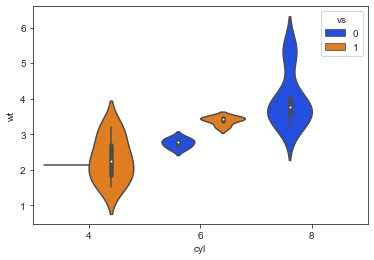

In [40]:
sns.violinplot(x='cyl', 
               y='wt',
               hue='vs',
               data=mtcars)

### 14.1.10 双变量分布图

本节最后介绍的是双变量分布图，它用于展示双变量的分布和关系，通过 jointplot() 函数实现。

下面绘制图形展示行程和汽车重量的一维分布与二维核密度。

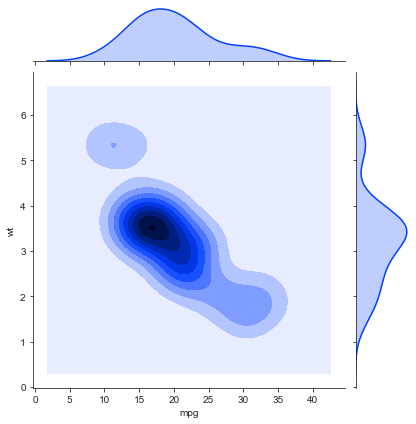

In [41]:
sns.jointplot(x='mpg', y='wt',
             data=mtcars,
             kind='kde')

下面通过修改 kind 选项展示上述两个变量的直方图和线性回归图。

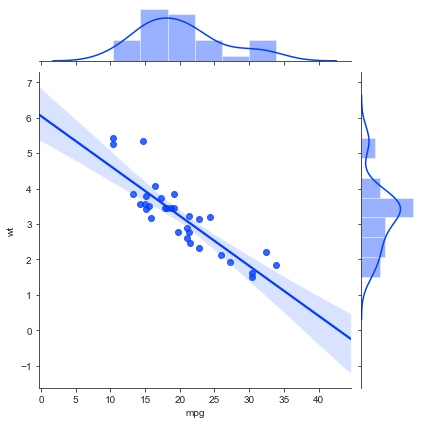

In [42]:
sns.jointplot(x='mpg', y='wt',
             data=mtcars,
             kind='reg')

## 14.2 Bokeh

Bokeh 是一个交互式可视化库，支持 Web 浏览器，它的目标是同时提供优雅简洁的图形风格和大型数据集的高性能交互功能特性。Bokeh 可以用于快速地创建交互式仪表盘和数据分析应用。

## 14.3 Plotnine

ggplot2 是基于《图形语法》的 R 语言实现，它提供了非常灵活的图形生成和组合方法，目前有大量的拓展包。由于 ggplot2 的流行性，有开发者将它的功能移植到了 Python 社区，并命名为 plotnine 库。

plotnine 库的语法与 R 语言的 ggplot2 基本一致，不过需要在每行的执行语句外层使用括号，以避免 Python 的错误语法解析。